In [8]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [9]:
df = pd.read_csv('Admission_Predict.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [11]:
X = df.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

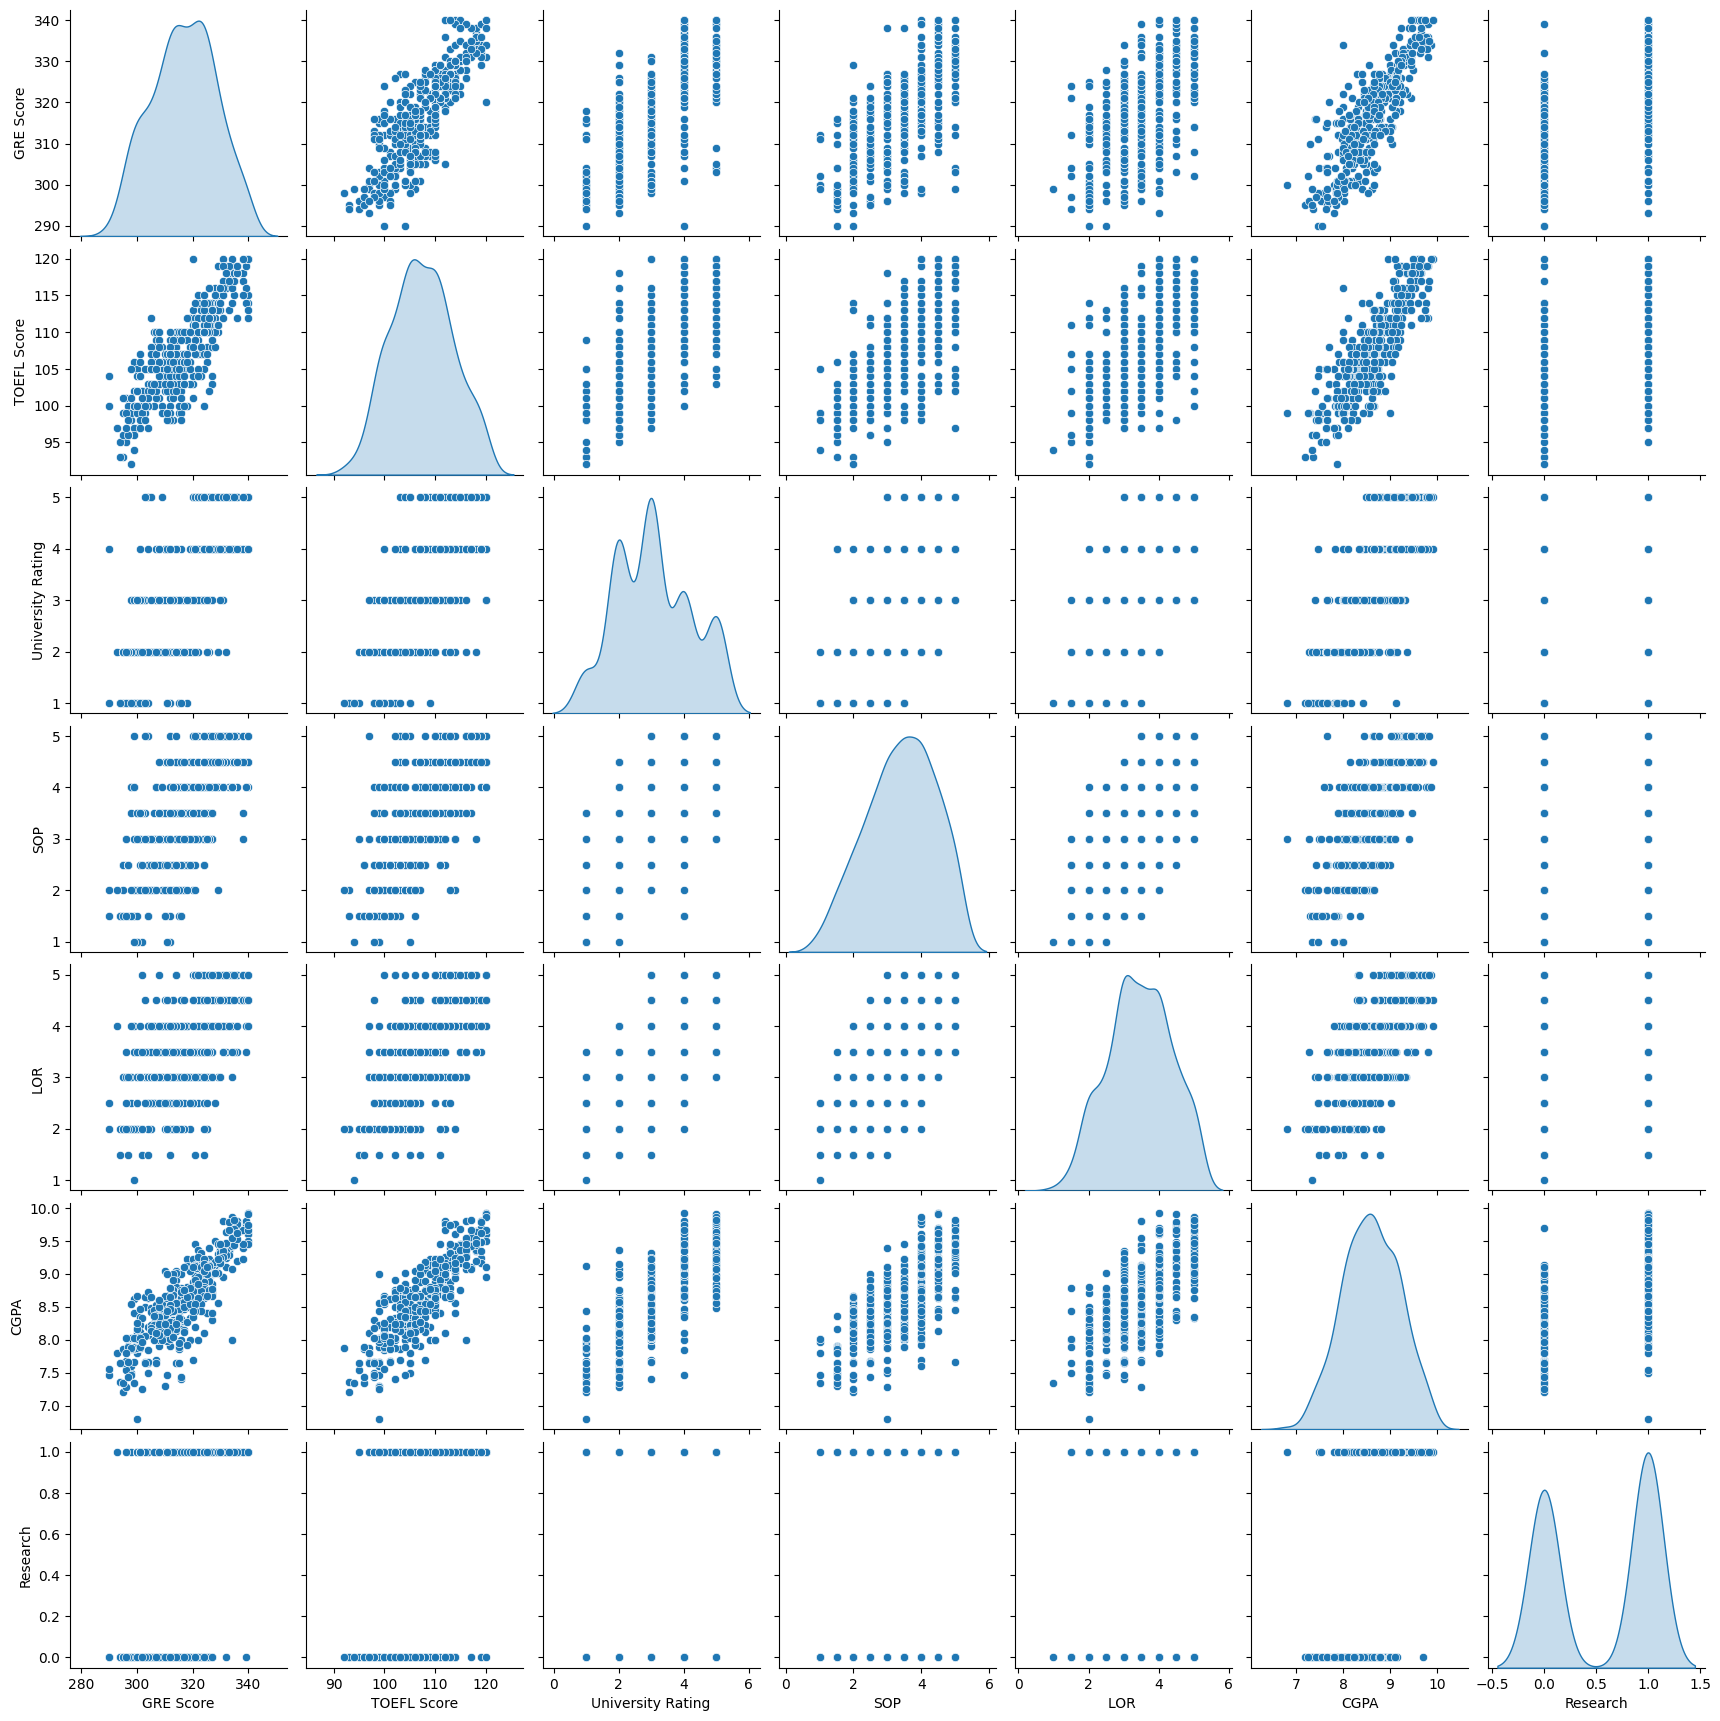

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(X, diag_kind='kde')
plt.show()

<Axes: >

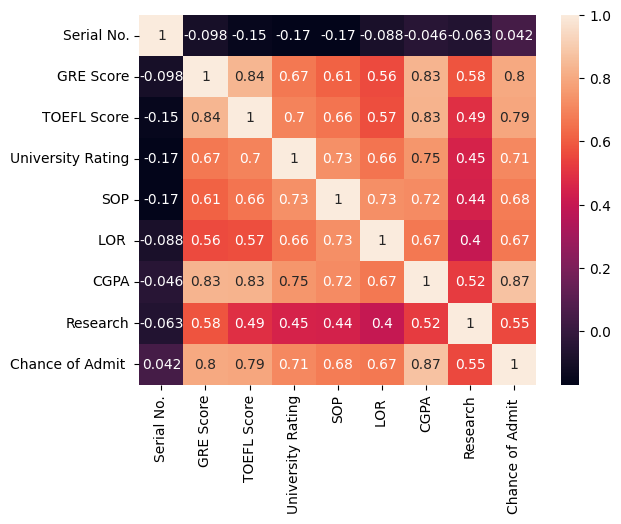

In [13]:
#heatmap
sns.heatmap(df.corr(), annot=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#regression
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(7,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

e:\ML\ML\.env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 58.7417 
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.6089 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 8.3172
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8328 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 1.0467
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.4860
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1867 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.0948
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0377 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0259 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0236 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.0209
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.0217
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0208 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [17]:
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
0.01281513196648892


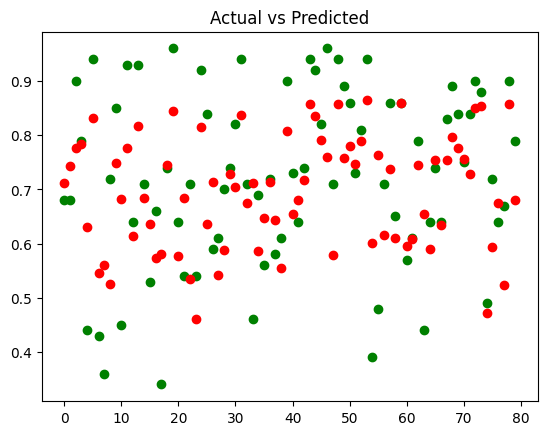

In [23]:
plt.scatter(range(len(y_test)), y_test, color='green')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('Actual vs Predicted')
plt.show()
